In [56]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
# In[155]:


input_filename = "NVT_water_T_300.xyz"

num_atoms = 3057
cos_line = 9
iter_=0
total_time_steps = 2000
time_steps_scale = 5


matrix_atom = np.zeros((total_time_steps,num_atoms,5))
dipole_mtrx = np.zeros((total_time_steps,num_atoms//3,3))
iter_ = 0
sk = cos_line*(iter_+1) + num_atoms*iter_
#sk_t = 1*(iter_+1) + (num_atoms+7)*iter_
data_ = np.loadtxt(input_filename,skiprows=sk, max_rows=num_atoms)
iter_ = 1



while iter_ < total_time_steps:
    sk = cos_line*(iter_+1) + num_atoms*iter_
    #sk_t = 1*(iter_+1) + (num_atoms+7)*iter_
    data_now = np.loadtxt(input_filename,skiprows=sk, max_rows=num_atoms)
#%step_now = np.loadtxt(input_filename,skiprows=sk_t, max_rows=1)
    matrix_atom[iter_] = data_now
    atom_array = data_now
    o_indices = np.where((atom_array[:, 1] == 1.))[0]# & (np.float(atom_array[:, 2]) < 10) & (np.float(atom_array[:, 2]) > -10) & (np.float(atom_array[:, 3]) < 10) & (np.float(atom_array[:, 3]) > -10) & (np.float(atom_array[:, 4]) < 10) & (np.float(atom_array[:, 4]) > -10))[0] 

    o_atoms = atom_array[o_indices, 2:].astype(float)
    h1_atoms = atom_array[o_indices + 1, 2:].astype(float)
    h2_atoms = atom_array[o_indices + 2, 2:].astype(float)
    
    
    oh1 = o_atoms - h1_atoms
    oh2 = o_atoms - h2_atoms
    oh1 = pbc(oh1, box_size)
    oh2 = pbc(oh2, box_size)
    
    qh = 0.4238  
    #dipole_vectors = qh*(oh1 + oh2)#dipole_vector/2
    dipole_mtrx[iter_] = qh*(oh1 + oh2)
    #if iter_ < 10:
    #data_ = data_now
#         step_ = np.zeros(step_now.shape)
    #else:
    #data_ = np.concatenate((data_, data_now), axis =0)
#         step_ = np.concatenate(step_, step_now, axis =0)
    
    iter_ +=1
    print(iter_)
#     print(data_now.shape)
#    print(iter_,data_now.shape)
#except StopIteration:
#    pass


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


/var/folders/hg/pfcp5n3j1lv5vdsyp98gr4n80000gp/T/ipykernel_73311/1293174632.py:20: RuntimeWarning: divide by zero encountered in log
  corr_range = range(len(np.log((corr_atom[:]))))
/var/folders/hg/pfcp5n3j1lv5vdsyp98gr4n80000gp/T/ipykernel_73311/1293174632.py:20: RuntimeWarning: invalid value encountered in log
  corr_range = range(len(np.log((corr_atom[:]))))


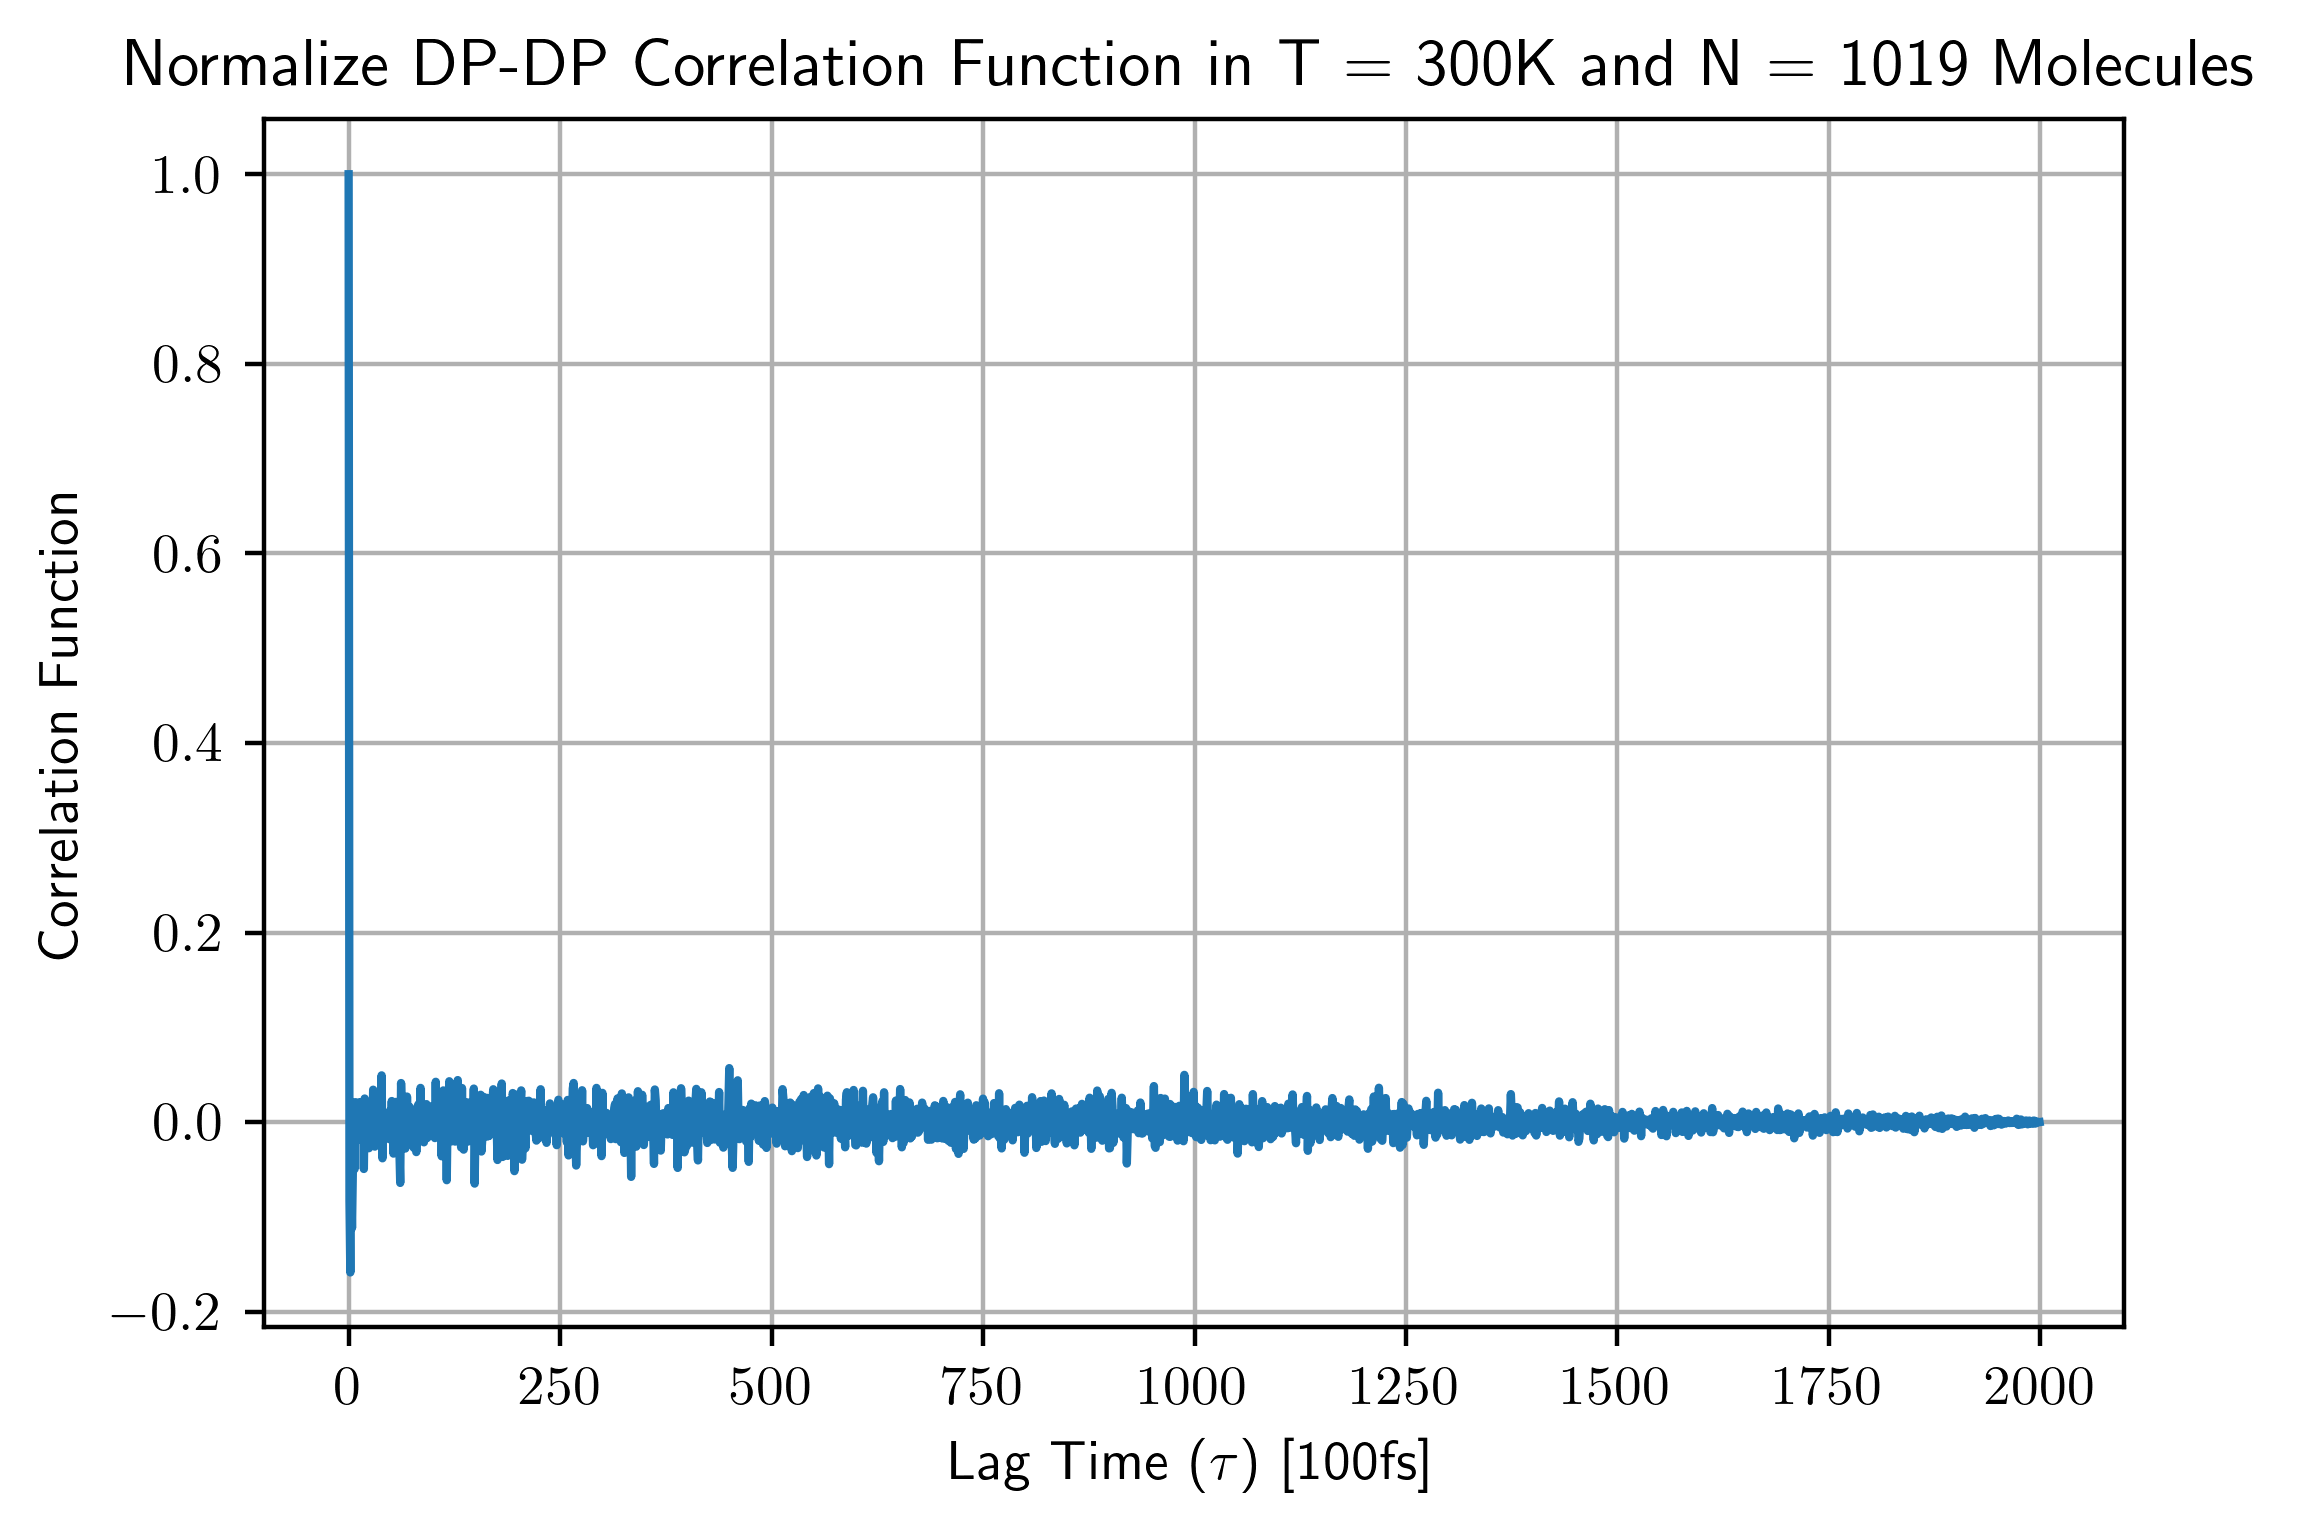

In [60]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
N_step = total_time_steps
corr_atom = np.zeros(N_step)

dipole_x = np.sum(dipole_mtrx[:,:,0],axis = 1)
dipole_y = np.sum(dipole_mtrx[:,:,1],axis = 1)
dipole_z = np.sum(dipole_mtrx[:,:,2],axis = 1)

#dipole_abs = array_i[:,0] #np.sqrt(array_i[:,0]**2 + array_i[:,1]**2 + array_i[:,2]**2)#
#print(dipole_abs.shape)
#dipole_i = dipole_i_x + dipole_i_y + dipole_i_z
correlation_x = correlate(dipole_x, dipole_x, mode='full')
correlation_y = correlate(dipole_y, dipole_y, mode='full')
correlation_z = correlate(dipole_z, dipole_z, mode='full')
dipol_product_sqr = np.dot(dipole_x,dipole_x) + np.dot(dipole_y,dipole_y) + np.dot(dipole_z,dipole_z) 

correlation = (correlation_x + correlation_y + correlation_z)/dipol_product_sqr
corr_atom[:] = correlation[N_step - 1:2*N_step + 1]
corr_range = range(len(np.log((corr_atom[:]))))
#plt.plot(range(len(corr_atom[:])),np.log(corr_atom))
#plt.plot(corr_range,np.log(corr_atom))

plt.plot(corr_atom)
#plt.plot(corr_atom[:],scalex= loglog, scaley=loglog)
#print(correlation.shape)
#corr_atom = np.array(corr_atom)
#corr = np.mean(corr_atom, axis = 0)

    

np.savetxt('corr_croos_300.txt',corr_atom)  
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['text.usetex'] = True
plt.xlabel('Lag Time ($\\tau$) [100fs]')
plt.ylabel('Correlation Function')
plt.title('Normalize DP-DP Correlation Function in T = 300K and N = '+str(int(num_atoms/3))+' Molecules')
plt.grid(True)
plt.show()

    #corr_atom.append(correlation)
#plt.plot(np.mean(corr_atom))

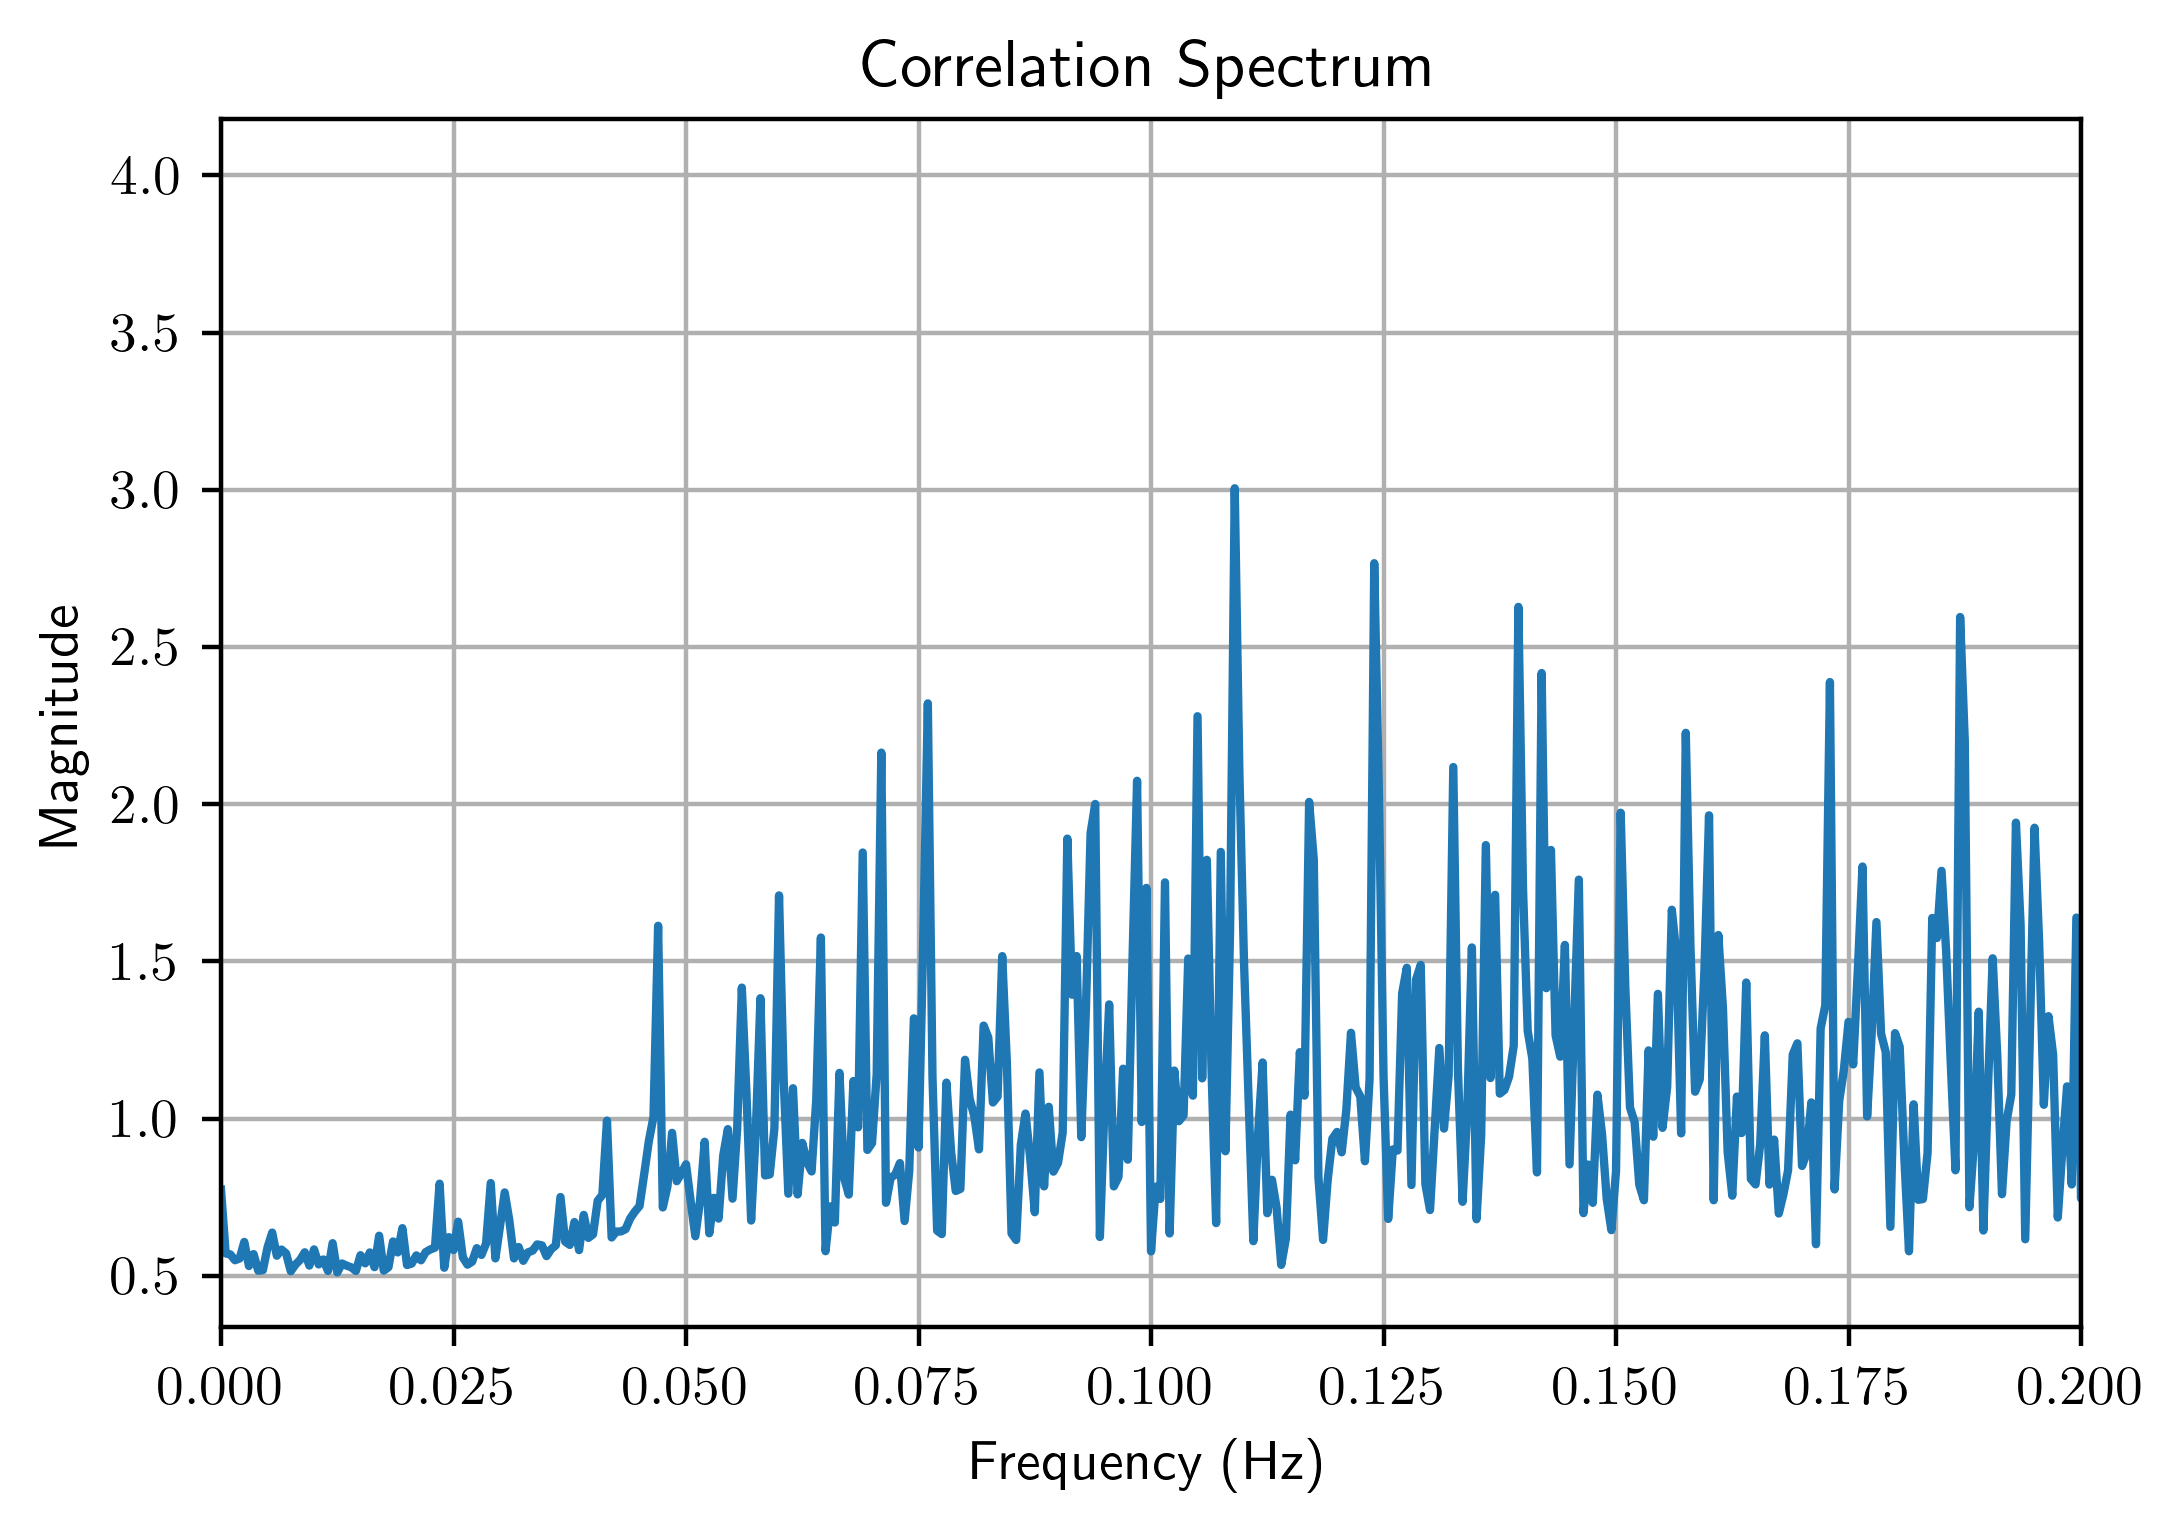

In [66]:
import numpy as np
import matplotlib.pyplot as plt
#corr = np.mean(corr_atom, axis = 0)

# Replace this with your actual time series of correlation functions
# For demonstration purposes, let's generate a random time series
correlation_time_series = corr_atom#correlation[3800:0:-1]
total_lags = len(correlation_time_series)#correlation[3800:0:-1])

# Apply Fast Fourier Transform (FFT)
correlation_spectrum = np.fft.fft(correlation_time_series)

# Calculate the corresponding frequency values
sampling_rate = 1.0  # Adjust this if your time series has a different sampling rate
frequencies = np.fft.fftfreq(total_lags, d=1/sampling_rate)

size_freq = len(frequencies)//2

# Plot the spectrum
plt.plot(frequencies[:size_freq], np.abs(correlation_spectrum)[:size_freq])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Correlation Spectrum")
plt.grid(True)
plt.xlim([0,0.2])
plt.show()


In [57]:
dipole_mtrx.shape

(2000, 1019, 3)

In [ ]:
# Read the input .xyz file
input_filename = "NVT_water_T_300.xyz"
output_filename = "NVT_water_T_300_rev.xyz"

# Extract time step lines and atom lines
time_step_lines = []
time_step = 0
atom_dict = dict()
atome_lines = []
capture_atoms = False
inside_ts = False
time_count = 0
num_atoms = 3057
sample_time_sacle = 100
outfile = open(output_filename, 'w')
n_a = 0
time_step_str = ""

with open(input_filename, 'r') as infile:

    for line in infile:
        if line.startswith("ITEM: TIMESTEP"):
            n_a = 0
            outfile.write("ITEM: TIMESTEP = \n")
            print("ITEM: TIMESTEP = ")
            for line in infile:
                #print(line)
                if line.startswith("ITEM: ATOMS"):
                    for line in infile:
                        print("&&"+line.strip()+"\n")
                        outfile.write(line.strip()+"\n")
                        if n_a > num_atoms:
                            break
                        n_a += 1
                if n_a > num_atoms:
                    break
            
            



In [ ]:
# In[108]:


input_filename = "NVT_water_T_300.xyz"
output_filename = "NVT_water_T_300_rev.xyz"

# Read the input .xyz file

# Extract time step lines and atom lines
time_step_lines = []
time_step = 0
atom_dict = dict()
atome_lines = []
capture_atoms = False
inside_ts = False
time_count = 0
num_atoms = 3057
sample_time_sacle = 100
outfile = open(output_filename, 'w')
n_a = 0
time_step_str = ""

with open(input_filename, 'r') as infile:

    for line in infile:
        if line.startswith("ITEM: TIMESTEP"):
            n_a = 0
            for line in infile:
                if line.startswith("ITEM: ATOMS"):
                    for line in infile:
                        outfile.write(line.strip()+"\n")
                        if n_a > num_atoms:
                            break
                        n_a += 1
            
            #time_step_lines.append("ITEM TIMESTEP = " + str(time_step) +'\n')
            #time_step_str = "ITEM TIMESTEP = " + str(time_step) +'\n'
            #time_step_linese_step_num.append(lines[time_count+1].strip())
            capture_atoms = False
            outfile.write("ITEM: TIMESTEP = "+str(time_step)+"\n")
            time_step += sample_time_sacle


        elif line.startswith("ITEM: ATOMS"):
            capture_atoms = True
            n_a = 0

            for line in infile:
                #atom_lines.append(line.strip())
                
            #for line in atom_lines:
                outfile.write(line.strip()+"\n")
                if n_a > num_atoms:
                    break
                n_a += 1

        #elif capture_atoms:
        #    atom_lines.append(line.strip())

        time_count += 1
        #print(time_step_linese_step_num[:-1])
        #if len(time_step_linese_step_num[:-1])>0:
        #    print(time_step_linese_step_num[:-1][0])
    
        # Write the time step lines and atom lines to the output file
        #for line in time_step_lines:
        
        
        
        time_step_lines.clear()
        time_step_linese_step_num.clear()
        atom_lines.clear()
    
    
outfile.close()
# Write the time step lines and atom lines to the output file
#with open(output_filename, 'w') as outfile:
#    for line in time_step_lines:
#        outfile.write(line + '\n')
#    for line in time_step_linese_step_num:
#        outfile.write(line + '\n')

#    for line in atom_lines:
#        outfile.write(line + '\n')

print("Output file with time steps and atom configurations has been created.")


# In[100]:


output_file_path = "NVT_water_T_300_rev.xyz"
trajectories = {}
current_timestep = None
atom_data = []
numer_of_selected_atoms = 3057
total_time_steps_limit = 200000
offset_time_stps = 0
lines = []
count = 0
fs = 1 
n_a = 0

with open(output_file_path, 'r') as file:
    count = 0
    for line in file:
        if "ITEM: TIMESTEP" in line and count <= total_time_steps_limit - sample_time_sacle:
            lines.append(line + str(count))
            n_a = 0
            for line in file:
                #atom_lines.append(line.strip())
                
            #for line in atom_lines:
                #print(line)
                lines.append(line)
                if n_a > num_atoms:
                    break
                n_a += 1
            count += sample_time_sacle
            lines.append(line)
        elif count > total_time_steps_limit - sample_time_sacle:
            break
        #elif count <= total_time_steps_limit - sample_time_sacle:
            
        #    if "ITEM: TIMESTEP" in line:
                #lines.append(line)
        #        count += sample_time_sacle
            #if count % (fs*sample_time_sacle) == 5:        
        #    lines.append(line)


            #if "ITEM: TIMESTEP" in line:
            #    count += sample_time_sacle
            #lines.append(line)

        #    break
        #elif count < total_time_steps_limit - sample_time_sacle:
        #    lines.append(line)
        #    count += sample_time_sacle

print(lines[:100])

for i, line in enumerate(lines[:]):
    print(i , line)
    if line.startswith("ITEM: TIMESTEP"):
        #current_timestep = int(lines[i + 1].strip())
        if current_timestep is not None and current_timestep % (fs*sample_time_sacle) == 0:
            trajectories[current_timestep] = atom_data
            atom_data = []
        print(current_timestep)
        #if current_timestep > total_time_steps_limit + offset_time_stps:
        #    break
    
        num_atoms = numer_of_selected_atoms

        for j in range(num_atoms):
            #print(lines[i+j+1])
            #atom_id, atom_type, x, y, z = lines[i+j+1].split()
            #print(atom_id,atom_type,x,y,z)
            atom_data.append((atom_id, atom_type, x, y, z))
        #i += num_atoms

if current_timestep is not None:
    trajectories[current_timestep] = atom_data

# Print atom positions for each timestep
#time_step_vec = []
#for timestep, atom_data in trajectories.items():
#    print(f"TIMESTEP {timestep}")
    #for atom_id, atom_type, x, y, z in atom_data:
        #print(f"{atom_id} {atom_type} {x} {y} {z}")
#    time_step_vec.append(timestep)
        
atom_data_dict = trajectories
file.close()


In [10]:
data_[:3060]

array([[ 1.     ,  1.     , 10.4028 , 27.0824 ,  3.7531 ],
       [ 2.     ,  2.     , 10.6489 , 28.0194 ,  3.50533],
       [ 3.     ,  2.     ,  9.47488, 26.8865 ,  3.43607],
       ...,
       [ 1.     ,  1.     , 10.4028 , 27.0824 ,  3.7531 ],
       [ 2.     ,  2.     , 10.6489 , 28.0194 ,  3.50533],
       [ 3.     ,  2.     ,  9.47488, 26.8865 ,  3.43607]])

In [ ]:
import numpy as np


# Convert the atom data dictionary to a NumPy array for faster computation
atom_data_array = {}
box_size = 31
Equi_time_steps = offset_time_stps
Prod_time_steps = total_time_steps_limit
time_step_max = Equi_time_steps + Prod_time_steps 
#Correct coordinates
def pbc(x,box_size):
    x = x - box_size*np.round(x/box_size)
    return x





for timestep, atom_list in atom_data_dict.items():
    #print(timestep,atom_list[1])
    atom_data_array[timestep] = np.array([[item for item in atom] for atom in atom_list])

# Dictionary to store dipole vectors for each time step
dipole_vectors = {}

whole_timesteps = []

# Loop through each time step and calculate dipole vectors using NumPy
for timestep, atom_array in atom_data_array.items():
    
    print(timestep)
    if len(atom_array) == 0:
        continue
    #print(atom_array)
    if timestep % 100 == 0:
        print(timestep)
    atom_array = np.array(atom_array)
    #print(atom_array)
    o_indices = np.where((atom_array[:, 1] == '1'))[0]# & (np.float(atom_array[:, 2]) < 10) & (np.float(atom_array[:, 2]) > -10) & (np.float(atom_array[:, 3]) < 10) & (np.float(atom_array[:, 3]) > -10) & (np.float(atom_array[:, 4]) < 10) & (np.float(atom_array[:, 4]) > -10))[0] 
    o_atoms = atom_array[o_indices, 2:].astype(float)
    h1_atoms = atom_array[o_indices + 1, 2:].astype(float)
    h2_atoms = atom_array[o_indices + 2, 2:].astype(float)
    
    
    oh1 = o_atoms - h1_atoms
    oh2 = o_atoms - h2_atoms
    oh1 = pbc(oh1, box_size)
    oh2 = pbc(oh2, box_size)
    
    # Calculate dipole vectors with the adjusted charge for oxygen
    #dipole_vector = oh1 + oh2#h1_atoms + h2_atoms - 2 * o_atoms
    #print(dipole_vector)

    dipole_vectors[timestep] = oh1 + oh2#dipole_vector/2
    #print(len(dipole_vectors[timestep]))
    #print(len(oh1 + oh2))
# Print dipole vectors for each time step
#for timestep, vectors in dipole_vectors.items():
#    print(f"Time step {timestep}:")
#    for vector in vectors:
#       print(f"Dipole vector: {vector}")
        
        


In [ ]:
ts = dipole_vectors.keys()
dp = []
dpx = []
dpy = []
dpz = []
for item in ts:
    dp.append(dipole_vectors[item][0])
    
for item in dp:
    dpx.append(item[0])
for item in dp:
    dpy.append(item[1])
#for item in dp:
#    dpz.append(item[2])
    
plt.plot(np.multiply(np.sign(dpx),np.exp(-np.abs(dpx))))
#plt.plot(dpx)
#plt.hist(np.sqrt(dpx**2+dpy**2+dpz**2))

In [ ]:
plt.hist(dpx)

In [ ]:
dipole_vectors.keys()

In [ ]:
dipole_matrix = np.array([dipole_vectors[ts] for ts in dipole_vectors.keys()])
dipole_concat = np.concatenate(dipole_matrix)
dipole_concat

In [ ]:
dipole_matrix

In [ ]:
dipole_matrix = np.reshape(dipole_matrix,(len(dipole_vectors.keys()),-1,3))

N_step = np.shape(dipole_matrix)[0]
N_atom = np.shape(dipole_matrix)[1]

print(N_step)

# Case1:  correlation terms, cross correlations are excluded.

## $C(\tau) = \sum_{i,j}\langle\vec{dp}_i(t_0)\cdot \vec{dp}_j(t_0+\tau) \rangle \delta_{ij}$

In [ ]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

corr_atom = np.zeros((N_atom,N_step))
t_zero = np.zeros((N_atom,))

for i in range(N_atom):
    dipole_i_x = dipole_matrix[:,i,0]
    dipole_i_y = dipole_matrix[:,i,1]
    dipole_i_z = dipole_matrix[:,i,2]
    
    dipol_product_sqr = np.dot(dipole_i_x,dipole_i_x) + np.dot(dipole_i_y,dipole_i_y) + np.dot(dipole_i_z,dipole_i_z) 
    #dipole_abs = array_i[:,0] #np.sqrt(array_i[:,0]**2 + array_i[:,1]**2 + array_i[:,2]**2)#
    #print(dipole_abs.shape)
    #dipole_i = dipole_i_x + dipole_i_y + dipole_i_z
    correlation_x = correlate(dipole_i_x, dipole_i_x, mode='full')
    correlation_y = correlate(dipole_i_y, dipole_i_y, mode='full')
    correlation_z = correlate(dipole_i_z, dipole_i_z, mode='full')
    correlation = (correlation_x + correlation_y + correlation_z)/dipol_product_sqr
    corr_atom[i,:] = correlation[N_step - 1:2*N_step + 1]
    plt.plot(corr_atom[i,:])
    #print(correlation.shape)
    #corr_atom = np.array(corr_atom)
    corr = np.mean(corr_atom, axis = 0)
    indices = np.argwhere(corr_atom[i,:] < 0)
    try: 
        t_zero[i] = np.min(indices)
    except:
        continue
    
np.savetxt('corr300.txt',corr)  
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['text.usetex'] = True
plt.xlabel('Lag Time ($\\tau$) [100fs]')
plt.ylabel('Correlation Function')
plt.title('Normalize DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()
plt.plot(corr)


    #corr_atom.append(correlation)
#plt.plot(np.mean(corr_atom))

In [ ]:
t_zero = np.nonzero(t_zero)
plt.hist(t_zero, bins=20)

# Case 2: Cross-correlation terms included 
## $C(\tau) = \sum_{i,j}\langle\vec{dp}_i(t_0)\cdot \vec{dp}_j(t_0+\tau) \rangle$


In [ ]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

corr_atom = np.zeros(N_step)

dipole_x = np.sum(dipole_matrix[:,:,0],axis = 1)
dipole_y = np.sum(dipole_matrix[:,:,1],axis = 1)
dipole_z = np.sum(dipole_matrix[:,:,2],axis = 1)

#dipole_abs = array_i[:,0] #np.sqrt(array_i[:,0]**2 + array_i[:,1]**2 + array_i[:,2]**2)#
#print(dipole_abs.shape)
#dipole_i = dipole_i_x + dipole_i_y + dipole_i_z
correlation_x = correlate(dipole_x, dipole_x, mode='full')
correlation_y = correlate(dipole_y, dipole_y, mode='full')
correlation_z = correlate(dipole_z, dipole_z, mode='full')
dipol_product_sqr = np.dot(dipole_x,dipole_x) + np.dot(dipole_y,dipole_y) + np.dot(dipole_z,dipole_z) 

correlation = (correlation_x + correlation_y + correlation_z)/dipol_product_sqr
corr_atom[:] = correlation[N_step - 1:2*N_step + 1]
corr_range = range(len(np.log((corr_atom[:]))))
#plt.plot(range(len(corr_atom[:])),np.log(corr_atom))
#plt.plot(corr_range,np.log(corr_atom))

plt.plot(corr_atom)
#plt.plot(corr_atom[:],scalex= loglog, scaley=loglog)
#print(correlation.shape)
#corr_atom = np.array(corr_atom)
#corr = np.mean(corr_atom, axis = 0)

    

np.savetxt('corr_croos_300.txt',corr_atom)  
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['text.usetex'] = True
plt.xlabel('Lag Time ($\\tau$) [100fs]')
plt.ylabel('Correlation Function')
plt.title('Normalize DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()

    #corr_atom.append(correlation)
#plt.plot(np.mean(corr_atom))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual time series of correlation functions
# For demonstration purposes, let's generate a random time series
correlation_time_series = corr_atom#correlation[3800:0:-1]
total_lags = len(corr)#correlation[3800:0:-1])

# Apply Fast Fourier Transform (FFT)
correlation_spectrum = np.fft.fft(correlation_time_series)

# Calculate the corresponding frequency values
sampling_rate = 1.0  # Adjust this if your time series has a different sampling rate
frequencies = np.fft.fftfreq(total_lags, d=1/sampling_rate)

size_freq = len(frequencies)//2

# Plot the spectrum
plt.plot(frequencies[:size_freq], np.abs(correlation_spectrum)[:size_freq])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Correlation Spectrum")
plt.grid(True)
plt.xlim([0,0.05])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#numer_of_selected_atoms = 10
# Convert the dipole vectors dictionary to a NumPy array
dipole_vectors_array = {}
for timestep, vectors in dipole_vectors.items():
    #if timestep % 50 == 0:

    dipole_vectors_array[timestep] = np.array(vectors)


# Calculate the inner products of dipole vectors for each time step
dot_products = {}
for timestep, vectors in dipole_vectors_array.items():
    #if timestep % 50 == 0:

    dot_products[timestep] = np.dot(vectors, vectors.T)

# Calculate the correlation function for different lag times (\tau)
def calculate_correlation(tau):
    correlation = []
    print(tau)
    for timestep, dot_product in dot_products.items():
        #if timestep % 10 == 0:
        timestep_tau = timestep + tau
        #print(timestep_tau)
        #if timestep_tau in dot_products:
        #if timestep_tau < len(dipole_vectors_array):
        #if dipole_vectors_array[timestep_tau] != None:
        if timestep_tau < total_time_steps_limit - 10:
            corr = np.mean(dipole_vectors_array[timestep] * dipole_vectors_array[timestep_tau]) / dot_product
            correlation.append(corr)
    return np.mean(correlation)

# Define the range of lag times (\tau) you're interested in
tau_values = range(0, 000,50)  # Adjust the range as needed

# Calculate the correlation function for each lag time
correlation_function = [calculate_correlation(tau) for tau in tau_values]

# Plot the correlation function
plt.plot(tau_values, correlation_function, marker='o')
plt.xlabel('Lag Time (tau) [5fs]')
plt.ylabel('Normalized Correlation')
plt.title('Normalized DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual time series of correlation functions
# For demonstration purposes, let's generate a random time series
correlation_time_series = correlation_function
total_lags = len(correlation_function)

# Apply Fast Fourier Transform (FFT)
correlation_spectrum = np.fft.fft(correlation_time_series)

# Calculate the corresponding frequency values
sampling_rate = 1.0  # Adjust this if your time series has a different sampling rate
frequencies = np.fft.fftfreq(total_lags, d=1/sampling_rate)

# Plot the spectrum
plt.plot(frequencies, np.abs(correlation_spectrum))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Correlation Spectrum")
plt.grid(True)
plt.show()


In [ ]:
for j in range(0, num_mol):
  x = A[3*j+0, t_start : ]
  y = A[3*j+1, t_start : ]
  z = A[3*j+2, t_start : ]
  xyz2 = np.array([x[:],y[:],z[:]])
  xyz = np.transpose(xyz2)

  fs = 1/t_step_for_filt
  fc = 1/100
  # Apply butterworth filtering here to obtain the filtered vector (fx, fy, fz)
  [b,a] = signal.butter(2, fc/(fs/2))

  fxyz = np.zeros([len(x), 3])
  fxyz[:,0] = signal.filtfilt(b, a, x)
  fxyz[:,1] = signal.filtfilt(b, a, y)
  fxyz[:,2] = signal.filtfilt(b, a, z)

  sxyz = np.zeros([len(fxyz[:,0]), 3])
  sxyz[:,0] = smooth(fxyz[:,0], int(100./t_step))
  sxyz[:,1] = smooth(fxyz[:,1], int(100./t_step))
  sxyz[:,2] = smooth(fxyz[:,2], int(100./t_step))

  for ii in range (0, tim):
    sxyz[ii,:]=sxyz[ii,:]/np.sqrt(np.dot(sxyz[ii,:],sxyz[ii,:]))

  # Compute the velocity and dot product
  vxyz = np.zeros([len(fxyz[:,0])-1 , 3])
  vxyz[:,0] = np.diff(sxyz[:,0])
  vxyz[:,1] = np.diff(sxyz[:,1])
  vxyz[:,2] = np.diff(sxyz[:,2])

  sxyz_1 = np.zeros([len(fxyz[:,0])-1, 3])
  sxyz_1[:,0] = sxyz[:-1,0]
  sxyz_1[:,1] = sxyz[:-1,1]
  sxyz_1[:,2] = sxyz[:-1,2]

  qxyz = np.cross(sxyz_1, vxyz)

  for ii in range (0, len(qxyz)):
    qxyz[ii,:]=qxyz[ii,:]/np.sqrt(np.dot(qxyz[ii,:],qxyz[ii,:]))

	# Compute the dot product between consecutive frames as indication of change of geodesic.
  ah = np.zeros([len(qxyz)-1])

  for i in range (0, len(qxyz)-1):
    factor = np.dot(qxyz[i,:],qxyz[i,:])*np.dot(qxyz[i+1,:],qxyz[i+1,:])
    ah[i] = 1.0 - np.dot(qxyz[i,:],qxyz[i+1,:])/np.sqrt(factor)

    if(1e3*ah[i]>0.1):
      counts[j]+=1

    if(ah[i] <= threshold):
      ah[i] = 0.0

  l = argrelextrema(ah, np.greater)
  t = np.array(l)

  # change in jump of angle , change in the angle
  ang = np.zeros(int(len(l[0])))
  dt = np.zeros(int(len(l[0])))
  mol = np.zeros(int(len(l[0])))

  ang[0] = np.dot(xyz[t[0,0],:], xyz[0,:])/np.sqrt(np.dot(xyz[t[0,0],:],xyz[t[0,0],:])*np.dot(xyz[0,:],xyz[0,:]))
  ang[0] = np.arccos(ang[0])
  dt[0] = t[0,0]
  mol =  np.full(int(len(l[0])), j, dtype=int)

  for i in range(1, len(l[0])):
    ang[i] = np.dot(xyz[t[0,i],:],xyz[t[0,i-1],:])/np.sqrt( np.dot( xyz[t[0,i],:],xyz[t[0,i],:] ) * np.dot(xyz[t[0,i-1],:],xyz[t[0,i-1],:]) )
    ang[i] = np.arccos(ang[i])
    dt[i] = t[0,i]-t[0,i-1]

  ang = ang*(180/np.pi)

  b_ang.append(ang[:])
  b_dt.append(dt[:])
  b_time.append(t[0,:])
  b_mol.append(mol[:])

b_ang_array = []
b_dt_array = []
b_time_array = []
b_mol_array = []

for item in b_ang:
  for i in item:
    b_ang_array.append(i)

for item in b_dt:
  for i in item:
    b_dt_array.append(i * t_step)

for item in b_time:
  for i in item:
    b_time_array.append(i * t_step)

for item in b_mol:
  for i in item:
    b_mol_array.append(i)

tbs = np.array([b_ang_array[:], b_dt_array[:], b_time_array[:],b_mol_array[:]])
tbs_transpose = np.transpose(tbs)
tbs_sort = tbs_transpose[tbs_transpose[:,2].argsort()]
